In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import time
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# knn

In [10]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

def objective(trial):

    n_neighbors = trial.suggest_int('n_neighbors', 3, 15)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p= trial.suggest_categorical('p',[1, 2])

    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

    mse = -cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean()
    
    return mse

# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
best_params = study.best_params
best_value = study.best_value
print("Best Parameters: ", best_params)
print("Best Value: ", best_value)
knn = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn.fit(X_train, y_train)

[I 2024-01-01 10:57:10,847] A new study created in memory with name: no-name-9a24f874-4793-403b-b415-af03194b7462
[I 2024-01-01 10:57:10,950] Trial 0 finished with value: 0.0008373157957402373 and parameters: {'n_neighbors': 12, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.0008373157957402373.
[I 2024-01-01 10:57:11,039] Trial 1 finished with value: 0.0007004489612332597 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'p': 2}. Best is trial 1 with value: 0.0007004489612332597.
[I 2024-01-01 10:57:11,143] Trial 2 finished with value: 0.0006283106057929841 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: 0.0006283106057929841.
[I 2024-01-01 10:57:11,241] Trial 3 finished with value: 0.0005025233897546657 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.0005025233897546657.
[I 2024-01-01 10:57:11,347] Trial 4 finished with value: 0.0007896323535511032 and parameters: {'n_n

[I 2024-01-01 10:57:15,030] Trial 41 finished with value: 0.00044420875344535805 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:15,144] Trial 42 finished with value: 0.00044420875344535805 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:15,228] Trial 43 finished with value: 0.0004551220840733972 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:15,327] Trial 44 finished with value: 0.0004691690117971794 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:15,411] Trial 45 finished with value: 0.00044420875344535805 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I

[I 2024-01-01 10:57:19,212] Trial 83 finished with value: 0.0004551220840733972 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:19,308] Trial 84 finished with value: 0.0004541219554404311 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:19,407] Trial 85 finished with value: 0.00044420875344535805 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:19,507] Trial 86 finished with value: 0.00044420875344535805 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'p': 2}. Best is trial 5 with value: 0.00044420875344535805.
[I 2024-01-01 10:57:19,591] Trial 87 finished with value: 0.0004551220840733972 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 1}. Best is trial 5 with value: 0.00044420875344535805.
[I 

Total time taken:  9.909696340560913
Best Parameters:  {'n_neighbors': 5, 'weights': 'distance', 'p': 2}
Best Value:  0.00044420875344535805


KNeighborsRegressor(weights='distance')

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
params_best['n_neighbors'] = int(params_best['n_neighbors'])
knn_reg=KNeighborsRegressor(**best_params)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [14]:
y_pred= knn_reg.predict(X_test)
y_pred1=knn_reg.predict(X_val)
y_pred2=knn_reg.predict(X_train)

In [15]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.01650384599570983
mean_squared_error: 0.0005408395284442838
rmse: 0.023255956837857344
r2 score: 0.9891525784707974


In [16]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.012746558259063352
mean_squared_error: 0.0003115396719372521
rmse: 0.017650486450442437
r2 score: 0.9936310376915166


In [17]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.016549601011360316
mean_squared_error: 0.000551595607850019
rmse: 0.023486072635713683
r2 score: 0.989233096567893


In [18]:
from yellowbrick.regressor import PredictionError

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


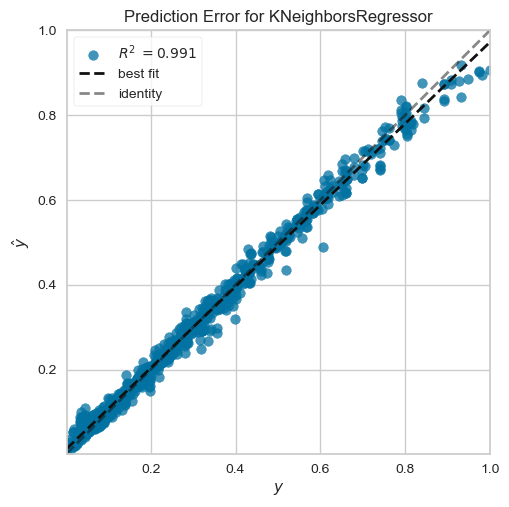

<Axes: title={'center': 'Prediction Error for KNeighborsRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [19]:
visualizer = PredictionError(knn)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()